# **All Imports**

In [178]:
#pip install dash

In [179]:
#pip install dash_bootstrap_components

In [180]:
#pip install jupyter_dash

In [181]:
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [182]:
df_titanic=pd.read_csv('TitanicClean.csv')
df_titanic.drop('Unnamed: 0',axis=1,inplace=True)
df_titanic

,Age,Cabin,Embarked,Fare,Fsize,PassengerId,Pclass,Sex,Died,Survived
0,22,M,S,7.2500,2,1,3,male,Dead,0
1,38,C,C,71.2833,2,2,1,female,Alive,1
2,26,M,S,7.9250,1,3,3,female,Alive,1
3,35,C,S,53.1000,2,4,1,female,Alive,1
4,35,M,S,8.0500,1,5,3,male,Dead,0
...,...,...,...,...,...,...,...,...,...,...
1304,29,M,S,8.0500,1,1305,3,male,Dead,0
1305,39,C,C,108.9000,1,1306,1,female,Alive,1
1306,38,M,S,7.2500,1,1307,3,male,Dead,0
1307,29,M,S,8.0500,1,1308,3,male,Dead,0


In [183]:
df_prediction=pd.read_csv('Predictions.csv')
df_prediction.drop('Unnamed: 0',axis=1,inplace=True)
df_prediction

,K-Vals,Accuracy,Accuracy train,F1 score,F1 train
0,1,0.796438,0.977074,0.727891,0.969253
1,2,0.809160,0.896288,0.701195,0.840871
2,3,0.832061,0.894105,0.769231,0.854573
3,4,0.821883,0.890830,0.740741,0.842271
4,5,0.837150,0.891921,0.777778,0.850679
5,6,0.834606,0.882096,0.767025,0.831250
6,7,0.829517,0.881004,0.766551,0.835596
7,8,0.844784,0.881004,0.781362,0.831530
8,9,0.842239,0.879913,0.786207,0.833837
9,10,0.849873,0.874454,0.791519,0.821705


In [184]:
cm=np.loadtxt('confusionmatrix.csv')
cm

array([[222.,  21.],
       [ 38., 112.]])

# **Graph Data Prep**

#Survival

In [185]:
d_survived=df_titanic['Died']
d_survived=pd.DataFrame(d_survived.value_counts().reset_index())
d_survived.rename(columns={'index':'Survival'},inplace=True)
d_survived['Survival']=d_survived['Survival'].astype('category')
d_survived

,Survival,Died
0,Dead,815
1,Alive,494


#Age Categorizing

In [186]:
d_ageS=df_titanic.groupby('Age')['Survived'].mean().reset_index()
d_ageS=pd.DataFrame(d_ageS)
d_ageS.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_ageS['Survival Rate']=d_ageS['Survival Rate']*100
group=['Child(0-18 Years)','Youth(19-36 Years)','MiddleAge(37-54 Years)','Old(55-)']
d_ageS['Category']=pd.qcut(d_ageS['Age'],labels=group,q=[0,1/5,1/2,9/10,1])
d_ageS=pd.DataFrame(d_ageS)
d_ageS=d_ageS.reset_index(drop=True)
d_ageS.drop('Age',inplace=True,axis=1)
d_ageS=d_ageS.groupby('Category')['Survival Rate'].mean().reset_index()
d_ageS

,Category,Survival Rate
0,Child(0-18 Years),51.825397
1,Youth(19-36 Years),40.402807
2,MiddleAge(37-54 Years),38.079598
3,Old(55-),25.000000


#Ticket Cost Categorizing

In [187]:
d_fareS=df_titanic.groupby('Fare')['Survived'].mean().reset_index()
d_fareS=pd.DataFrame(d_fareS)
d_fareS.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_fareS['Survival Rate']=d_fareS['Survival Rate']*100
group=['Low(33th%)','Mid(33-50th%)','High(50-75th%)','Top End(75-100th%)']
d_fareS['Cost_Range']=pd.qcut(d_fareS['Fare'],labels=group,q=[0,1/3,1/2,3/4,1])
d_fareS=pd.DataFrame(d_fareS)
d_fareS=d_fareS.reset_index(drop=True)
d_fareS=pd.DataFrame(d_fareS.groupby('Cost_Range')['Survival Rate'].mean().reset_index())
d_fareS

,Cost_Range,Survival Rate
0,Low(33th%),25.620583
1,Mid(33-50th%),43.339073
2,High(50-75th%),40.863894
3,Top End(75-100th%),65.053198


#Cabin Categorizing

In [188]:
d_cabin=df_titanic.groupby('Cabin')['Survived'].mean().reset_index()
d_cabin.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_cabin['Survival Rate']=d_cabin['Survival Rate']*100
d_cabin

,Cabin,Survival Rate
0,A,45.454545
1,B,67.692308
2,C,57.446809
3,D,65.217391
4,E,68.292683
5,F,52.380952
6,G,60.000000
7,M,30.966469
8,T,0.000000


#Socio-Economic Condition

In [189]:
dict={3:'Poor',2:'Middle Class',1:'Wealthy'}

In [190]:
d_socioeco=df_titanic.groupby('Pclass')['Survived'].mean().reset_index()
d_socioeco.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_socioeco['Survival Rate']=d_socioeco['Survival Rate']*100
for i,val in enumerate(d_socioeco['Pclass']):
  d_socioeco['Pclass'][i]=dict[i+1]
d_socioeco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Pclass,Survival Rate
0,Wealthy,57.585139
1,Middle Class,42.238267
2,Poor,26.939351


#Family Size Categorizing

In [191]:
d_family=df_titanic.groupby('Fsize')['Survived'].mean().reset_index()
d_family.rename(columns={'Survived':'Survival Rate'},inplace=True)
d_family['Survival Rate']=d_family['Survival Rate']*100
d_family

,Fsize,Survival Rate
0,1,29.240506
1,2,53.191489
2,3,55.974843
3,4,72.093023
4,5,22.727273
5,6,20.000000
6,7,31.250000
7,8,12.500000
8,11,18.181818


# **Prediction Model Vizulization**

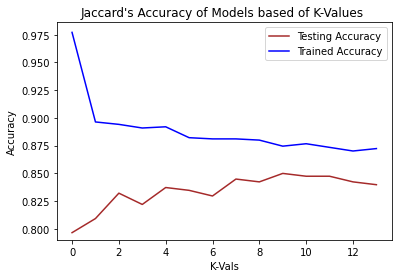

In [192]:
sns.lineplot(y=df_prediction['Accuracy'],x=df_prediction['K-Vals']-1,color='Brown')
sns.lineplot(y=df_prediction['Accuracy train'],x=df_prediction['K-Vals']-1,color='Blue')
plt.legend(['Testing Accuracy','Trained Accuracy'])
plt.title("Jaccard's Accuracy of Models based of K-Values ")
plt.ylim(0.79,)
plt.show()

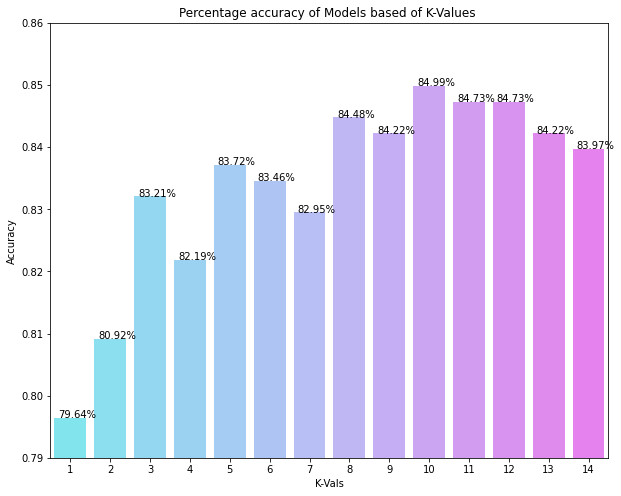

In [193]:
plt.figure(figsize=(10,8))
sns.barplot(y=df_prediction['Accuracy'],x=df_prediction['K-Vals'],palette='cool',alpha=0.6)
plt.title('Percentage accuracy of Models based of K-Values ')
plt.ylim(0.79,0.86)
for index, value in enumerate(df_prediction['Accuracy']):
  plt.annotate('%.2f'%(value*100)+'%', xy=(index-0.3,value), color='Black')
plt.show()

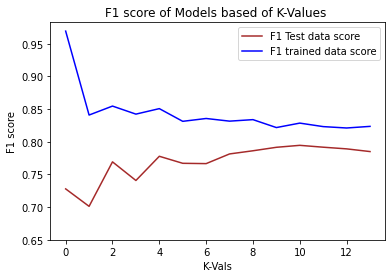

In [194]:
sns.lineplot(y=df_prediction['F1 score'],x=df_prediction['K-Vals']-1,color='Brown')
sns.lineplot(y=df_prediction['F1 train'],x=df_prediction['K-Vals']-1,color='Blue')
plt.legend(['F1 Test data score','F1 trained data score'])
plt.title("F1 score of Models based of K-Values ")
plt.ylim(0.65,)
plt.show()

Text(33.0, 0.5, 'Predicted Value')

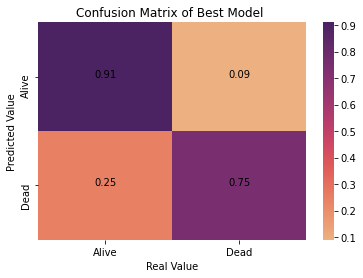

In [195]:
class_names=['Alive','Dead']
pcm=[]
for i in range(len(cm)):
  pcm.append(np.around(cm[i]/cm[i].sum(),decimals=2))   
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j+0.5, i+0.5, pcm[i][j], horizontalalignment="center", color='Black')
sns.heatmap(pcm,cmap='flare',xticklabels=class_names,yticklabels=class_names)
plt.title('Confusion Matrix of Best Model ')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')

#**DashBoarding**

Dash Prep

In [196]:
fig_survival=px.bar(d_survived,x='Survival',y='Died',title="Survivors",color='Survival')
fig_age=px.bar(d_ageS,x='Category',y='Survival Rate',title='Survivor Rate by Age Categorized',color='Category',range_y=[0,80])
fig_ticket=px.bar(d_fareS,x='Cost_Range',y='Survival Rate',title='Survivor Rate by Ticket Cost Categorized',color='Cost_Range',range_y=[0,80])
fig_cabin=px.bar(d_cabin,y='Cabin',x='Survival Rate',title='Survivor Rate by Cabin Categorized',color='Cabin',orientation='h',range_x=[0,80])
fig_socioeco=px.bar(d_socioeco,x='Pclass',y='Survival Rate',title='Survivor Rate by Socio-Economic Condition',color='Pclass',range_y=[0,80])
fig_family=px.bar(d_family,y='Fsize',x='Survival Rate',title='Survivor Rate by Family Size',color='Fsize',orientation='h',color_continuous_scale='oryel',range_x=[0,80])

In [197]:
fig_predictK=px.scatter(title="Jaccard's Accuracy of Models based of K-Values ")
f1=fig_predictK.add_scatter(x=df_prediction['K-Vals'],y=df_prediction['Accuracy train'],name='Trained Accuracy')
f1=fig_predictK.add_scatter(name='Testing Accuracy',x=df_prediction['K-Vals'],y=df_prediction['Accuracy'])

In [198]:
fig_predictF=px.scatter(title="F1 score of Models based of K-Values ")
f2=fig_predictF.add_scatter(x=df_prediction['K-Vals'],y=df_prediction['F1 train'],name='Trained Accuracy')
f2=fig_predictF.add_scatter(name='Testing Accuracy',x=df_prediction['K-Vals'],y=df_prediction['F1 score'])


In [199]:
tcm=pd.DataFrame(pcm)
tcm.rename(columns={0:'Alive',1:'Dead'},index={0:'Alive',1:'Dead'},inplace=True)

In [200]:
layout1=go.Layout(title='Confusion Matrix of Best Model')
figh = go.Figure(data=go.Heatmap(x=['Alive','Dead'],y=['Dead','Alive'],z=tcm[::-1],colorscale='viridis'),layout=layout1)

In [201]:
df_prediction1=df_prediction
df_prediction1['Accuracy']=df_prediction['Accuracy']*100

In [202]:
fig_predictFb=px.bar(df_prediction1,x='K-Vals',y='Accuracy',range_y=(79,86),color="K-Vals",title="Jaccard's Accuracy for Different Test values")

In [203]:
colors = {
    'background': '#F89D7D',
    'text': '#111111'
}

web app 


In [204]:
def homepage():
  layout=html.Div(children=[
                    html.Br(),
                    html.Br(),
                    html.Div([
                    html.Div(dcc.Graph(figure=fig_survival),style={'width':'50%'}),
                    html.Div(dcc.Graph(figure=fig_age),style={'width':'50%'}),],
                    style={'display':'flex'}),
                    html.Div([
                    html.Div(dcc.Graph(figure=fig_ticket),style={'width':'50%'}),
                    html.Div(dcc.Graph(figure=fig_cabin),style={'width':'50%'})
                    ,],
                    style={'display':'flex'}),
                    html.Div([
                    html.Div(dcc.Graph(figure=fig_socioeco),style={'width':'50%'}),
                    html.Div(dcc.Graph(figure=fig_family),style={'width':'50%'})
                    ,],
                    style={'display':'flex'}),
                    ])
  return layout


In [205]:
def predictpage():
  layout=html.Div(children=[
                    html.Br(),
                    html.Br(),
                    html.Div([
                    html.Div(dcc.Graph(figure=f1),style={'width':'50%'}),
                    html.Div(dcc.Graph(figure=f2),style={'width':'50%'}),],
                    style={'display':'flex'}),
                    html.Div([
                    html.Div(dcc.Graph(figure=fig_predictFb),style={'width':'50%'}),
                    html.Div(dcc.Graph(figure=figh),style={'width':'50%'})
                    ,],
                    style={'display':'flex'}),
                    ])
  return layout

dash app

In [206]:
apps = JupyterDash(__name__)


apps.layout = html.Div([html.H1('DashBoard for The Titanic',style={'textAlign':'Center','backgroundColor':colors['background'],'font-size':30}) ,dcc.Tabs([
        dcc.Tab(label='Titanic Analysis', children=[homepage()]),
        dcc.Tab(label='KNN Model Attributes', children=[predictpage()]),
        ]),                
])



if __name__=='__main__':
  apps.run_server(debug=True)



Dash app running on:


<IPython.core.display.Javascript object>